In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import time

from src.model import *

In [2]:
SPECTRA_DIR = 'Bruker_MPA/*' #FT-NIR

AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')

spectra_df = load_spectra_df(SPECTRA_DIR, AFSIS_PATH)

In [3]:
wet_chem_df = pd.read_csv('afsis/2009-2013/Wet_Chemistry/RRES/Wet_Chemistry_RRES.csv')
wet_chem_df.head()

,RES ID,SSN,pH,%N,%C,C % Inorg,C % Org,Am Ox_Al mg/kg,Am Ox-Fe mg/kg,AmOx-Mn/mg/kg,...,ICP OES Na mg/kg,ICP OES Ni mg/kg,ICP OES P mg/kg,ICP OES Pb mg/kg,ICP OES S mg/kg,ICP OES Zn mg/kg,ICPMS As 75 mg/kg,ICP MS Se 78 mg/kg,ICP MS Mo 95 mg/kg,ICP MS Cd 114 mg/kg
0,S5556/65,icr006454,7.85,0.08,0.95,0.0,0.94,2105.973713,868.347797,160.462825,...,47.887728,24.429761,96.575131,2.598904,76.237163,26.772643,0.275148,0.279136,0.059726,0.028904
1,S5556/66,icr006455,8.03,0.06,0.81,0.1,0.70,2703.686191,1095.670284,185.252606,...,53.883590,29.364300,117.423139,3.202964,71.830186,30.595783,0.353720,0.311853,0.087849,0.034731
2,S5556/67,icr006474,5.01,0.05,0.57,0.0,0.57,1554.842158,949.235199,52.608644,...,41.823016,12.741771,87.040073,1.955844,53.863557,16.704623,0.371205,0.318386,0.122075,0.005391
3,S5556/68,icr006475,4.57,0.05,0.47,0.0,0.47,1846.889773,1070.019199,33.656658,...,35.139059,14.918616,83.555482,1.817535,47.465608,20.073195,0.414072,0.351493,0.138884,0.003356
4,S5556/69,icr006492,6.78,0.09,0.98,0.0,0.98,1871.559305,1204.912035,172.634574,...,102.992719,24.403833,150.936463,3.326464,100.773286,26.102039,0.415931,0.488670,0.085807,0.031716


In [4]:
wet_chem_df.columns

Index(['RES ID', 'SSN', 'pH', '%N', '%C', 'C % Inorg  ', 'C % Org',
       'Am Ox_Al mg/kg', 'Am Ox-Fe mg/kg', 'AmOx-Mn/mg/kg', 'AmOx-Pmg/kg',
       ' Olsen P mg/kg', 'pbi no units', 'Caex cmolc/ kg soil',
       'Kex cmolc/ kg soil', 'Mgex cmolc/ kg soil', 'Naex cmolc/ kg soil',
       'ECEC cmolc/ kg soil', 'ICP OES Al mg/kg ', 'ICP OES Ca mg/kg ',
       'ICP OES Co mg/kg ', 'ICP OES Cr mg/kg ', 'ICP OES Cu mg/kg ',
       'ICP OES Fe mg/kg ', 'ICP OES K mg/kg ', 'ICP OES Mg mg/kg ',
       'ICP OES Mn mg/kg ', 'ICP OES Na mg/kg ', 'ICP OES Ni mg/kg ',
       'ICP OES P mg/kg ', 'ICP OES Pb mg/kg ', 'ICP OES S mg/kg ',
       'ICP OES Zn mg/kg ', 'ICPMS As 75 mg/kg', 'ICP MS Se 78 mg/kg',
       'ICP MS Mo 95 mg/kg', 'ICP MS Cd 114 mg/kg'],
      dtype='object')

In [5]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/RRES/Wet_Chemistry_RRES.csv'
elements = ['%N', '%C', 'C % Inorg  ', 'C % Org', 'ICP OES Ca mg/kg ', 'ICP OES K mg/kg ', 'ICP OES Mg mg/kg ', 'ICP OES P mg/kg ', 'pH']
columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN', usecols=columns_to_load)

In [6]:
data_df = spectra_df.merge(wet_chem_df, left_index=True, right_index=True)


In [7]:
contains_nan = data_df.isnull().values.sum()
contains_nan

20

In [8]:
data_df = data_df.dropna()

In [9]:
data_df

,12493.177,12489.320,12485.463,12481.606,12477.749,12473.892,12470.034,12466.177,12462.320,12458.463,...,3598.683,pH,%N,%C,C % Inorg,C % Org,ICP OES Ca mg/kg,ICP OES K mg/kg,ICP OES Mg mg/kg,ICP OES P mg/kg
icr049735,0.765804,0.765579,0.776812,0.795354,0.815153,0.827822,0.823997,0.810204,0.802608,0.806628,...,2.821408,5.24,0.12,1.63,0.0,1.63,1439.916099,8452.905013,8660.076226,389.427458
icr068419,0.462182,0.459072,0.460319,0.461889,0.461745,0.461250,0.464106,0.470280,0.473516,0.472700,...,2.416593,5.99,0.04,0.59,0.0,0.59,677.057779,1249.100962,900.052161,66.117292
icr075696,0.658960,0.654330,0.662424,0.672969,0.670191,0.663969,0.674582,0.691545,0.692512,0.682609,...,2.280757,6.17,0.05,0.56,0.0,0.56,369.582710,354.288602,169.766703,26.433931
icr074984,0.639500,0.637342,0.631346,0.629843,0.632373,0.635520,0.637938,0.638983,0.638686,0.638245,...,2.398916,6.75,0.05,0.50,0.0,0.50,1322.555561,2791.298925,2052.686570,57.758003
icr037621,0.483168,0.483097,0.484938,0.486736,0.485165,0.480816,0.482071,0.490361,0.493946,0.488738,...,2.431396,4.94,0.03,0.33,0.0,0.33,200.552653,502.024645,439.271683,85.842568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr073169,0.496839,0.495772,0.500408,0.507497,0.510511,0.509498,0.507674,0.507988,0.511325,0.513776,...,2.133600,5.28,0.05,0.67,0.0,0.67,173.621416,571.609630,355.589441,258.482505
icr072406,0.740597,0.743451,0.741775,0.745108,0.752276,0.751655,0.748653,0.752374,0.756866,0.756020,...,2.363690,5.00,0.04,0.77,0.0,0.77,73.389091,68.608840,67.499762,54.299904
icr037927,0.667443,0.668230,0.674360,0.680432,0.683531,0.681208,0.676185,0.674606,0.674096,0.671925,...,2.969660,4.82,0.26,3.20,0.0,3.20,1707.354279,1374.826544,2378.763829,762.956911
icr068500,0.429386,0.433595,0.433139,0.429771,0.429646,0.429906,0.428975,0.430933,0.432652,0.429123,...,2.346833,7.08,0.03,0.33,0.0,0.33,1295.249892,1087.217303,946.529666,54.439946


In [10]:
y = data_df[['%N', '%C', 'C % Inorg  ', 'C % Org', 'ICP OES Ca mg/kg ', 'ICP OES K mg/kg ', 'ICP OES Mg mg/kg ', 'ICP OES P mg/kg ', 'pH']]
y

,%N,%C,C % Inorg,C % Org,ICP OES Ca mg/kg,ICP OES K mg/kg,ICP OES Mg mg/kg,ICP OES P mg/kg,pH
icr049735,0.12,1.63,0.0,1.63,1439.916099,8452.905013,8660.076226,389.427458,5.24
icr068419,0.04,0.59,0.0,0.59,677.057779,1249.100962,900.052161,66.117292,5.99
icr075696,0.05,0.56,0.0,0.56,369.582710,354.288602,169.766703,26.433931,6.17
icr074984,0.05,0.50,0.0,0.50,1322.555561,2791.298925,2052.686570,57.758003,6.75
icr037621,0.03,0.33,0.0,0.33,200.552653,502.024645,439.271683,85.842568,4.94
...,...,...,...,...,...,...,...,...,...
icr073169,0.05,0.67,0.0,0.67,173.621416,571.609630,355.589441,258.482505,5.28
icr072406,0.04,0.77,0.0,0.77,73.389091,68.608840,67.499762,54.299904,5.00
icr037927,0.26,3.20,0.0,3.20,1707.354279,1374.826544,2378.763829,762.956911,4.82
icr068500,0.03,0.33,0.0,0.33,1295.249892,1087.217303,946.529666,54.439946,7.08


In [28]:
X = pd.DataFrame.drop(data_df, columns=['%N', '%C', 'C % Inorg  ', 'C % Org', 'ICP OES Ca mg/kg ', 'ICP OES K mg/kg ', 'ICP OES Mg mg/kg ', 'ICP OES P mg/kg ', 'pH'])
X_columns = X.columns
X

,12493.177,12489.320,12485.463,12481.606,12477.749,12473.892,12470.034,12466.177,12462.320,12458.463,...,3633.397,3629.540,3625.683,3621.826,3617.969,3614.111,3610.254,3606.397,3602.540,3598.683
icr049735,0.765804,0.765579,0.776812,0.795354,0.815153,0.827822,0.823997,0.810204,0.802608,0.806628,...,2.483031,2.416881,2.448243,2.666757,2.836452,2.845037,2.801358,2.664036,2.955150,2.821408
icr068419,0.462182,0.459072,0.460319,0.461889,0.461745,0.461250,0.464106,0.470280,0.473516,0.472700,...,2.486014,2.448970,2.406921,2.314077,2.269487,2.307636,2.471763,2.745914,2.518233,2.416593
icr075696,0.658960,0.654330,0.662424,0.672969,0.670191,0.663969,0.674582,0.691545,0.692512,0.682609,...,2.528381,2.464340,2.450494,2.390499,2.365294,2.268732,2.149735,2.193754,2.258132,2.280757
icr074984,0.639500,0.637342,0.631346,0.629843,0.632373,0.635520,0.637938,0.638983,0.638686,0.638245,...,2.347449,2.221356,2.333165,2.474789,2.352579,2.312051,2.382036,2.398119,2.381174,2.398916
icr037621,0.483168,0.483097,0.484938,0.486736,0.485165,0.480816,0.482071,0.490361,0.493946,0.488738,...,2.578062,2.353511,2.336806,2.359190,3.065895,3.073777,2.536645,2.514622,2.493378,2.431396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr073169,0.496839,0.495772,0.500408,0.507497,0.510511,0.509498,0.507674,0.507988,0.511325,0.513776,...,2.437793,2.405447,2.341112,2.231323,2.212081,2.226400,2.195110,2.152783,2.143749,2.133600
icr072406,0.740597,0.743451,0.741775,0.745108,0.752276,0.751655,0.748653,0.752374,0.756866,0.756020,...,2.586376,2.775536,3.185332,3.088738,2.837769,2.707362,2.528320,2.418445,2.383882,2.363690
icr037927,0.667443,0.668230,0.674360,0.680432,0.683531,0.681208,0.676185,0.674606,0.674096,0.671925,...,2.388566,2.336386,2.305541,2.273803,2.222784,2.307673,2.530437,2.930996,3.408540,2.969660
icr068500,0.429386,0.433595,0.433139,0.429771,0.429646,0.429906,0.428975,0.430933,0.432652,0.429123,...,2.500634,2.424644,2.457582,2.495903,2.532249,2.499202,2.366238,2.381651,2.468924,2.346833


In [12]:
%%time
y = np.log1p(y)

CPU times: user 917 µs, sys: 40 µs, total: 957 µs
Wall time: 611 µs


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


In [13]:
X = np.apply_along_axis(np.gradient, 1, X)

In [14]:
%%time
X_train, X_validate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CPU times: user 3.14 ms, sys: 48 µs, total: 3.19 ms
Wall time: 2.72 ms


In [15]:
columns = ['%N', '%C', 'C % Inorg  ', 'C % Org', 'ICP OES Ca mg/kg ', 'ICP OES K mg/kg ', 'ICP OES Mg mg/kg ', 'ICP OES P mg/kg ', 'pH']

In [46]:
column_vals = []
for val in X_columns:
    column_vals.append(float(val))

Training model for %N.
320 samples available.
CV r^2 score: 0.270
%N RMSE percentage = 0.5763305232548934


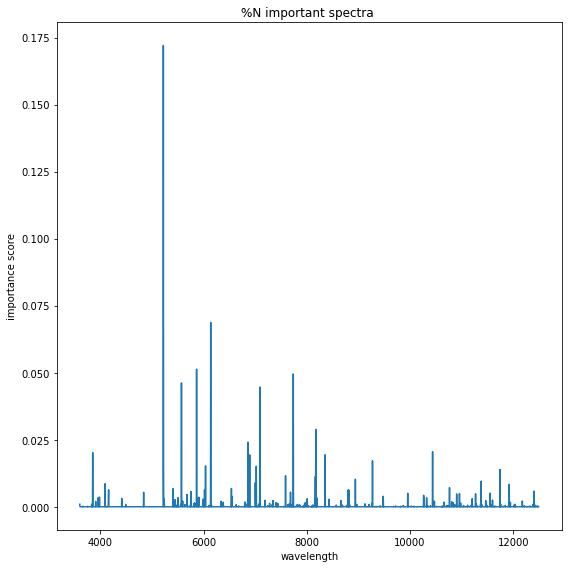

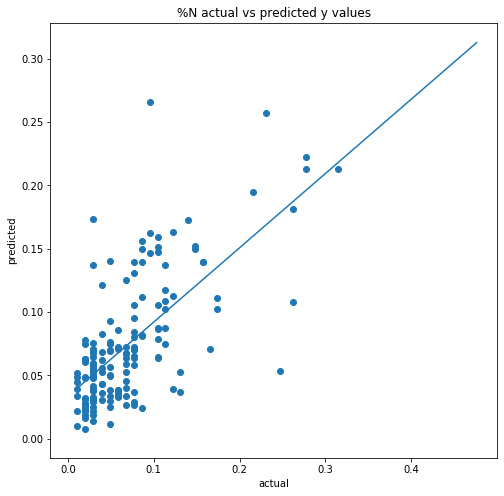

Training model for %C.
320 samples available.
CV r^2 score: 0.352
%C RMSE percentage = 0.3695542768447278


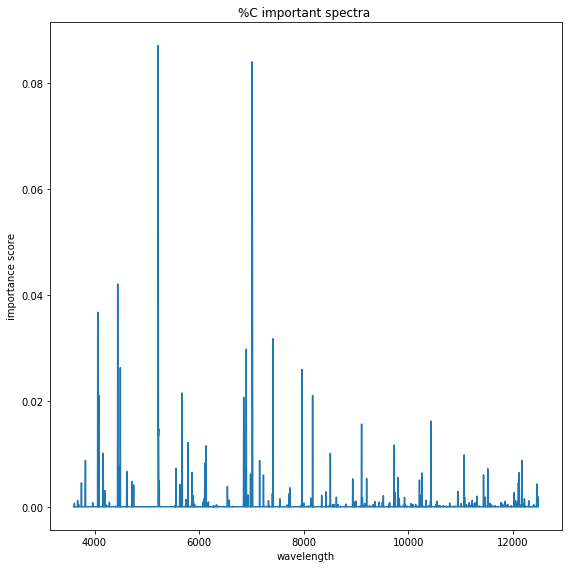

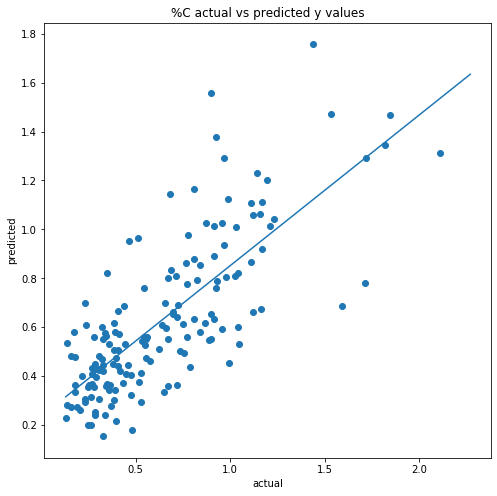

Training model for C % Inorg  .
320 samples available.
CV r^2 score: 0.177
C % Inorg   RMSE percentage = 2.816530478402314


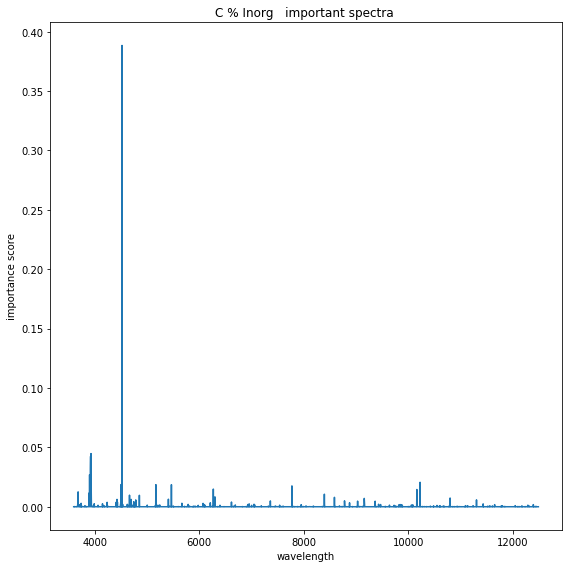

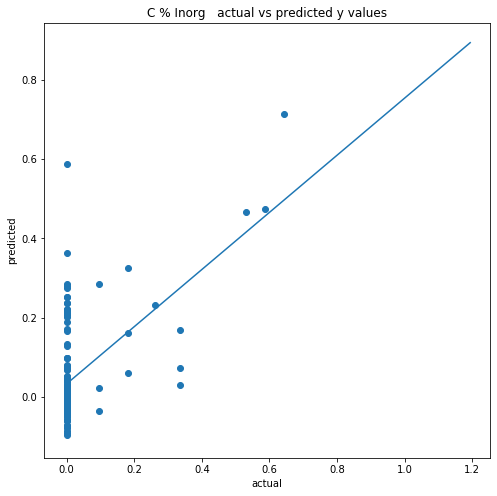

Training model for C % Org.
320 samples available.
CV r^2 score: 0.408
C % Org RMSE percentage = 0.37357339207142376


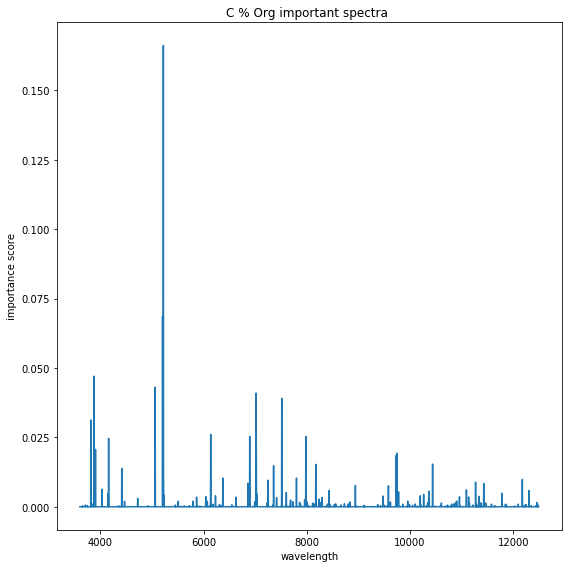

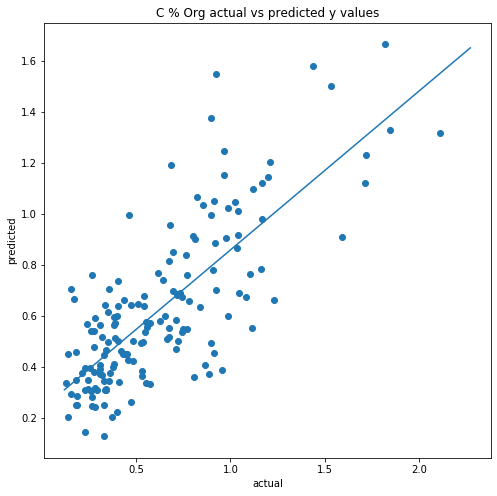

Training model for ICP OES Ca mg/kg .
320 samples available.
CV r^2 score: 0.584
ICP OES Ca mg/kg  RMSE percentage = 0.14353048568865562


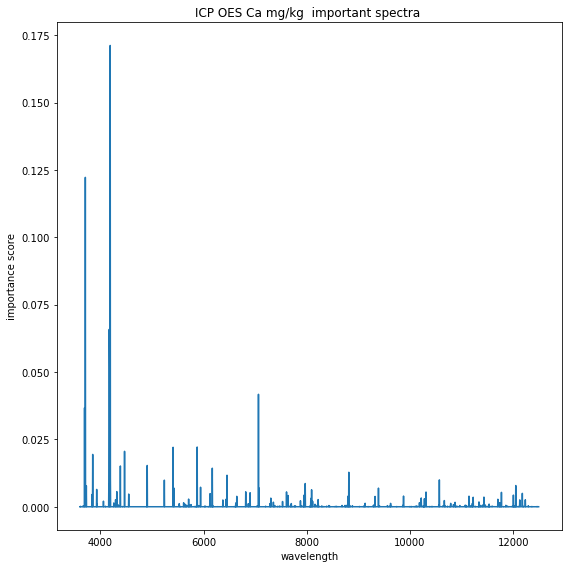

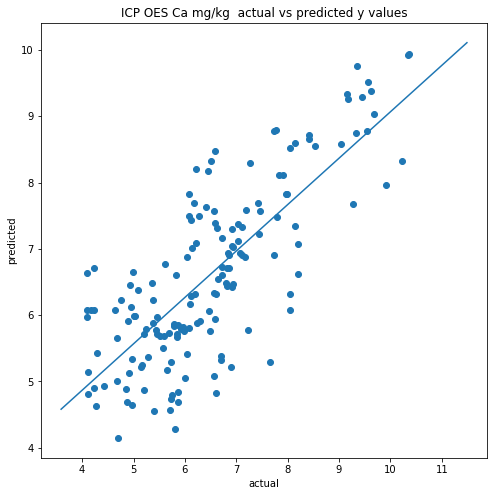

Training model for ICP OES K mg/kg .
320 samples available.
CV r^2 score: 0.499
ICP OES K mg/kg  RMSE percentage = 0.10224069497739903


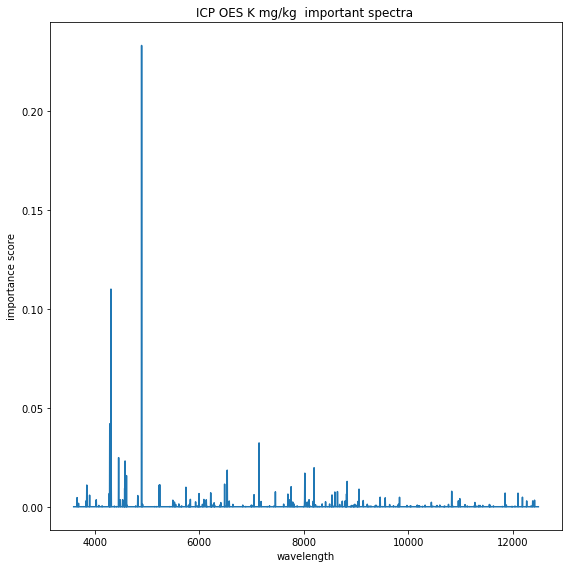

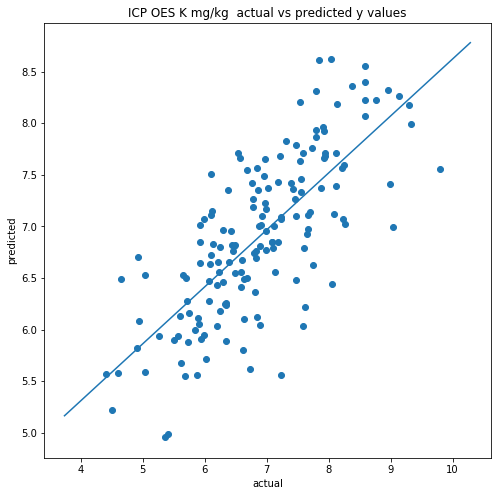

Training model for ICP OES Mg mg/kg .
320 samples available.
CV r^2 score: 0.662
ICP OES Mg mg/kg  RMSE percentage = 0.10595181476714816


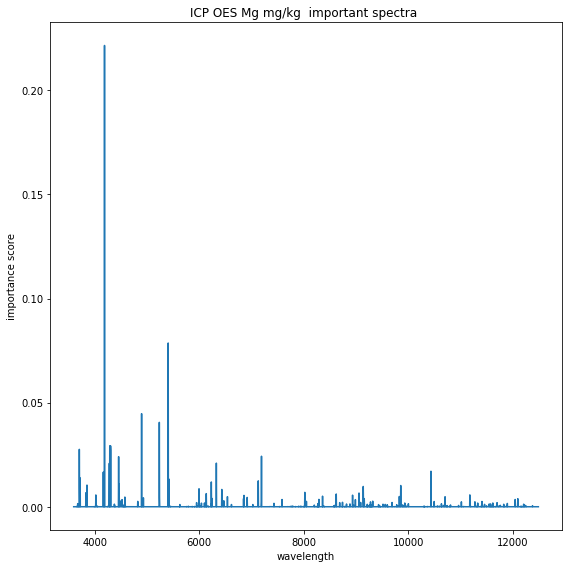

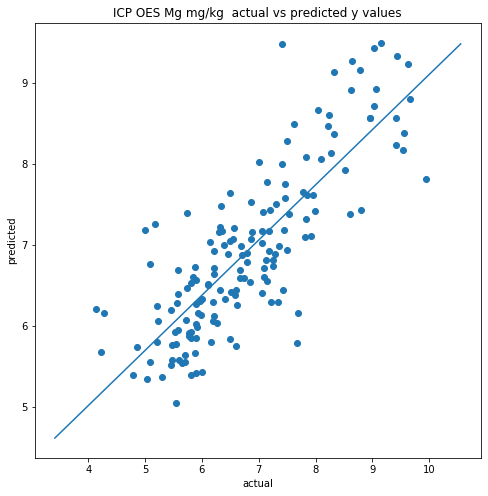

Training model for ICP OES P mg/kg .
320 samples available.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [48]:
%%time
models = []
for target in columns:
    #set the target value of interest
    Y_COLUMN = target
    
    #initialize the vanilla xgboost model
    model, r_squared = basic_xgboost3(X_train, y_train[Y_COLUMN])
    
    #fit and predict it for the target variable
    model.fit(X_train, y_train[Y_COLUMN])
    yhat = model.predict(X_validate)
    
    #evaluate results with root mean square error percentage
    rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
    _mean = y[Y_COLUMN].mean()
    rmsep = rmse / _mean
    print(f'{Y_COLUMN} RMSE percentage = {rmsep}')
    
    #plot the feature importance
    feature_importance = model.feature_importances_
    
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(column_vals, feature_importance)
    #plt.xticks(feature_importance, , rotation='vertical')
    plt.xlabel('wavelength')
    plt.ylabel('importance score')
    plt.title(f'{Y_COLUMN} important spectra ')
    plt.tight_layout()
    plt.show()
    
    #plot the predicted to true
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(y_test[Y_COLUMN], yhat)
    plt.title(f'{Y_COLUMN} actual vs predicted y values')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    #plot r squared
    plt.plot(np.unique(y[Y_COLUMN]), np.poly1d(np.polyfit(y_test[Y_COLUMN], yhat, 1))(np.unique(y[Y_COLUMN])))
    plt.show()
    